In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_dlim_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..D-Limonene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.341772
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.341772
2,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.341772
3,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.341772
4,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.341772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.240506
74996,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.240506
74997,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.240506
74998,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.240506


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..D-Limonene', 'index'], axis = 1)
y = df_knn[['X..D-Limonene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.34177215],
       [0.34177215],
       [0.34177215],
       ...,
       [0.24050633],
       [0.24050633],
       [0.24050633]])

<AxesSubplot:ylabel='Count'>

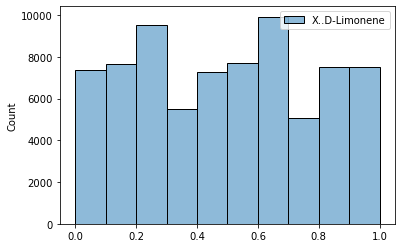

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.1035829853788968

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.029698402301782605

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.17233224394112265

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7916413952226369

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.6477777617924803

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([1.04045524e-01, 9.17393801e-02, 9.60220184e-02, 9.86009868e-02,
       9.94238341e-02, 4.20299343e-02, 2.40644792e-02, 9.66036607e-03,
       4.55179037e-04, 2.99774562e-03, 5.38211551e-03, 2.39936404e-10,
       7.28857603e-03, 4.16530083e-04, 3.89297563e-03, 5.66370000e-03,
       8.20899217e-03, 6.66062548e-03, 9.47312073e-11, 8.97926998e-03,
       5.86858065e-08, 7.82339338e-07, 8.23238846e-03, 6.21710660e-03,
       8.72800707e-03, 2.84938393e-03, 8.18966977e-03, 4.57763775e-04,
       4.17041181e-10, 3.08016906e-03, 9.60984335e-03, 1.33388892e-08,
       6.03850810e-03, 2.81406972e-07, 8.61877476e-07, 6.12906467e-03,
       7.86336960e-03, 8.18977260e-03, 4.10854353e-04, 1.86722259e-04,
       1.81671306e-04, 5.94506811e-03, 7.95600257e-05, 9.82090921e-03,
       3.65329068e-03, 3.79223552e-03, 1.77228764e-03, 1.27987929e-04,
       1.27088003e-02, 2.40441928e-03, 1.48256967e-01, 9.96659093e-03,
       2.84156773e-03, 2.25314362e-03, 7.57782355e-03, 1.23248855e-03,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,citrus,diesel
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0
3,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0
4,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0
...,...,...,...,...,...,...,...,...,...
74995,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0
74996,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0
74997,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1
74998,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'citrus',
 'diesel']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_dlim.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_dlim.pkl")

['selector_knn_lsa_elbow_dlim.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.11319768886879648

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.03339596349916021

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.18274562511633544

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7664007302278533

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.6036327094015541

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.0519529143002458

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.13729567128983533

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9698723323686079

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.7762734528756388

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_dlim.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_dlim.pkl")

['y_test_knreg_lsa_elbow_dlim.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.05218180427551345

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.018705465587616026

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.13676792601928284

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.7808913262439199

In [65]:
y_test

,X..D-Limonene
11591,0.367089
52020,0.626582
34666,0.354430
22169,0.139241
23049,0.267932
...,...
60863,0.261603
32316,0.257384
60933,0.261603
43206,0.721519


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

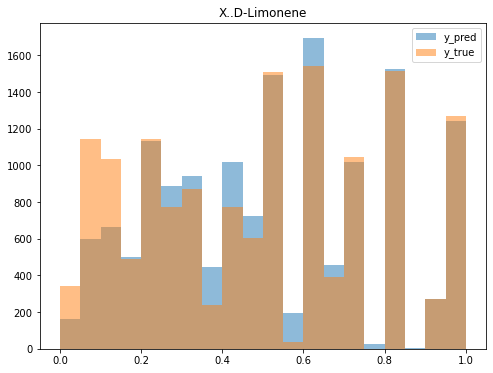

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..D-Limonene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_dlim.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.889
P-value: 0.000


<AxesSubplot:>

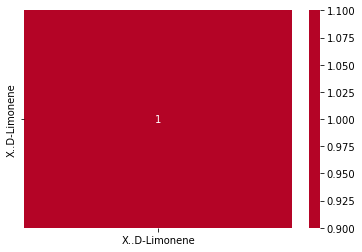

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)